In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_diabetes

In [ ]:
# Load dataset
data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target  # Target variable (progression of diabetes)

# Convert target to binary classification (0: low progression, 1: high progression)
median_target = df['target'].median()
df['target'] = np.where(df['target'] > median_target, 1, 0)
# Display 10 row of the dataset
print("First 10 row of the dataset:")
df.head(10)

First 10 row of the dataset:


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,1
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,1
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,1
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346,0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062917,-0.038357,0
7,0.063504,0.050680,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064,0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014960,0.011349,0
9,-0.070900,-0.044642,0.039062,-0.033213,-0.012577,-0.034508,-0.024993,-0.002592,0.067737,-0.013504,1


In [ ]:
# CHECK FOR MISSING VALUES
df.info()
# Check for missing values
print("\nMissing values in dataset:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    int64  
dtypes: float64(10), int64(1)
memory usage: 38.1 KB

Missing values in dataset:
age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


In [ ]:
# Split data into training and testing sets
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# DESCRIPTIVE STATISTICS
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,0.500000
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,0.500567
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,0.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,0.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,0.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,1.000000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,1.000000


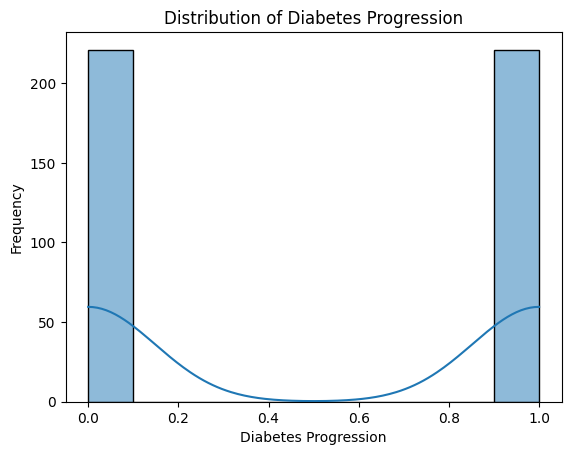

In [ ]:
# DISTRIBUTION OF TARGET VARIABLE (Diabetes Progression)
sns.histplot(df['target'], kde=True)
plt.title("Distribution of Diabetes Progression")
plt.xlabel("Diabetes Progression")
plt.ylabel("Frequency")
plt.show()

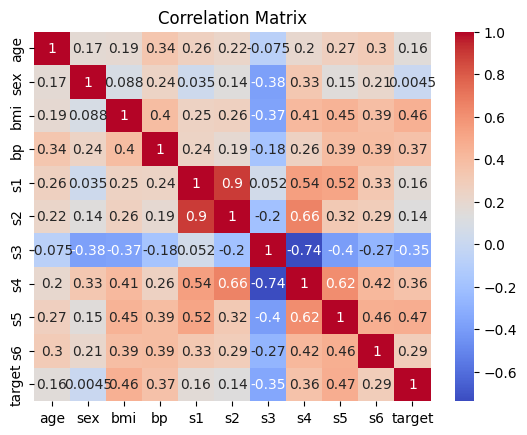

In [ ]:
# CORRELATION MATRIX
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

Random Forest - Model Performance:
Accuracy: 0.72

Classification Report:
                  precision    recall  f1-score   support

 Low Progression       0.74      0.76      0.75        49
High Progression       0.69      0.68      0.68        40

        accuracy                           0.72        89
       macro avg       0.72      0.72      0.72        89
    weighted avg       0.72      0.72      0.72        89



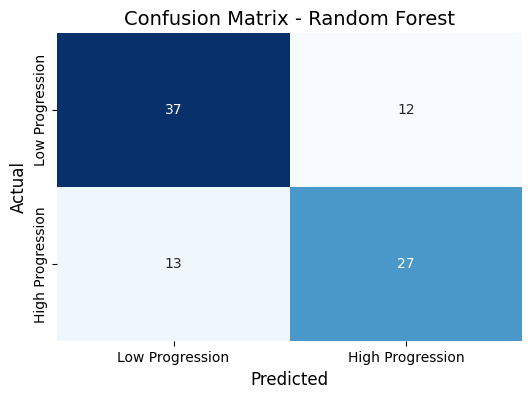

In [ ]:
# Train Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest - Model Performance:")
print(f"Accuracy: {accuracy_rf:.2f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['Low Progression', 'High Progression']))

# Confusion Matrix Visualization
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Low Progression', 'High Progression'],
            yticklabels=['Low Progression', 'High Progression'])
plt.title('Confusion Matrix - Random Forest', fontsize=14)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()

Logistic Regression - Model Performance:
Accuracy: 0.74

Classification Report:
                  precision    recall  f1-score   support

 Low Progression       0.77      0.76      0.76        49
High Progression       0.71      0.72      0.72        40

        accuracy                           0.74        89
       macro avg       0.74      0.74      0.74        89
    weighted avg       0.74      0.74      0.74        89



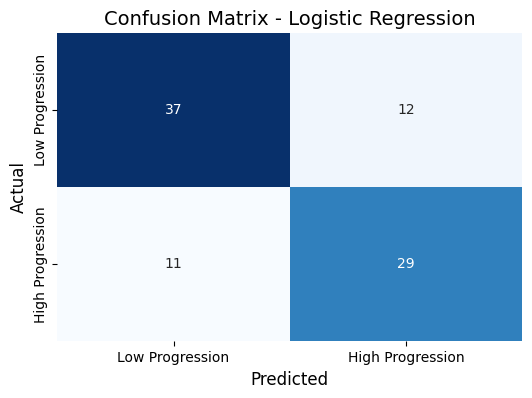

In [ ]:
# Train Logistic Regression Model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test)

# Evaluate
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression - Model Performance:")
print(f"Accuracy: {accuracy_lr:.2f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred_lr, target_names=['Low Progression', 'High Progression']))

# Confusion Matrix Visualization
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Low Progression', 'High Progression'],
            yticklabels=['Low Progression', 'High Progression'])
plt.title('Confusion Matrix - Logistic Regression', fontsize=14)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()

SVM - Model Performance:
Accuracy: 0.75

Classification Report:
                  precision    recall  f1-score   support

 Low Progression       0.76      0.80      0.78        49
High Progression       0.74      0.70      0.72        40

        accuracy                           0.75        89
       macro avg       0.75      0.75      0.75        89
    weighted avg       0.75      0.75      0.75        89



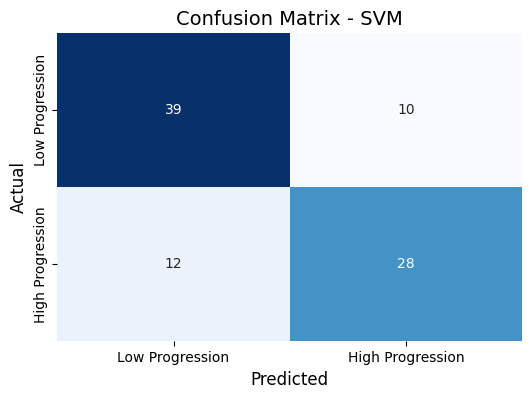

In [ ]:
# Train SVM Model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Predict
y_pred_svm = svm_model.predict(X_test)

# Evaluate
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM - Model Performance:")
print(f"Accuracy: {accuracy_svm:.2f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred_svm, target_names=['Low Progression', 'High Progression']))

# Confusion Matrix Visualization
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Low Progression', 'High Progression'],
            yticklabels=['Low Progression', 'High Progression'])
plt.title('Confusion Matrix - SVM', fontsize=14)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()

In [ ]:
print("Model Comparison:")
print(f"- Random Forest Accuracy: {accuracy_rf:.3f}")
print(f"- Logistic Regression Accuracy: {accuracy_lr:.3f}")
print(f"- SVM Accuracy: {accuracy_svm:.3f}")

print("\nThe best-performing model is the one with the highest accuracy.")

Model Comparison:
- Random Forest Accuracy: 0.719
- Logistic Regression Accuracy: 0.742
- SVM Accuracy: 0.753

The best-performing model is the one with the highest accuracy.


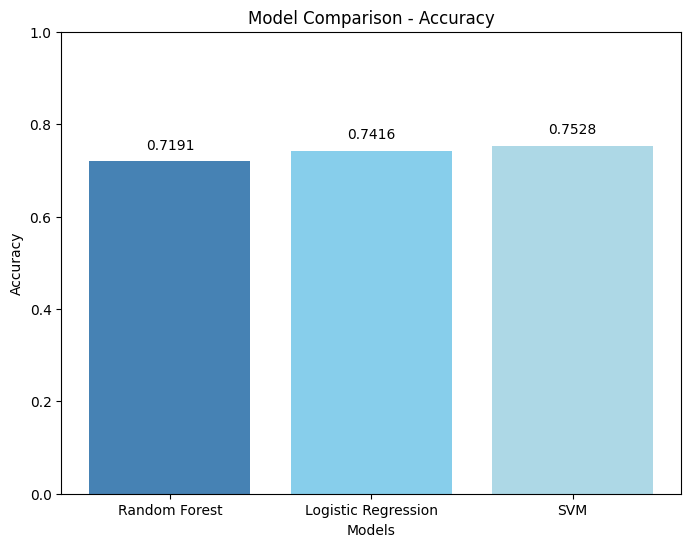

In [ ]:
import matplotlib.pyplot as plt

# Data for histogram
models = ['Random Forest', 'Logistic Regression', 'SVM']
accuracies = [accuracy_rf, accuracy_lr, accuracy_svm]

# Make the histogram
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['steelblue', 'skyblue', 'lightblue'])
plt.title('Model Comparison - Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1.0)
plt.grid(axis='y', linestyle='', alpha=0.7)

# Add accuracy values on top of each bar
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f'{acc:.4f}', ha='center', va='bottom')

plt.show()